In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
# read, summarize data
df = pd.read_csv("measures_export.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   record_id                                          1172 non-null   object 
 1   redcap_event_name                                  1172 non-null   object 
 2   partstatus                                         323 non-null    float64
 3   mini_suicide_sum                                   268 non-null    float64
 4   mini_suicide_dx                                    170 non-null    float64
 5   mini_suicide_dx_2                                  153 non-null    float64
 6   suicide_notes                                      58 non-null     object 
 7   suicide_protective                                 20 non-null     object 
 8   phq9_q9_only                                       178 non-null    float64
 9   phq9_que

In [3]:
# total number of records
df['record_id'].nunique()

323

In [4]:
# counts for each participant status
df['partstatus'].value_counts()

99.0    190
2.0      93
90.0     28
1.0      12
Name: partstatus, dtype: int64

In [5]:
# unique events
df['redcap_event_name'].unique()

array(['participant_status_arm_3', 'baseline_arm_3', 'week_3_arm_3',
       'week_6_arm_3', 'week_10_arm_3', 'week_14_arm_3', 'week_12_arm_3',
       'week_4_arm_3', 'week_8_arm_3', 'week_2_arm_3'], dtype=object)

In [6]:
# Number of complete & active participants
df.loc[(df['partstatus'] == 1) | (df['partstatus'] == 2), 'record_id'].nunique()

105

In [7]:
for i, row in df.iterrows():
    df.iloc[i,2] = df.loc[(df['record_id']==row['record_id']) & (df['redcap_event_name']=='participant_status_arm_3'), 'partstatus']
    df.iloc[i,39] = df.loc[(df['record_id']==row['record_id']) & (df['redcap_event_name']=='participant_status_arm_3'), 'new_current']

index_status = df[df['redcap_event_name']=='participant_status_arm_3'].index
df.drop(index_status, inplace=True)
df

,record_id,redcap_event_name,partstatus,mini_suicide_sum,mini_suicide_dx,mini_suicide_dx_2,suicide_notes,suicide_protective,phq9_q9_only,phq9_question_9_only_complete,...,phq8_1,phq8_2,phq8_3,phq8_4,phq8_5,phq8_6,phq8_7,phq8_8,phq8_total_score,patient_health_questionnaire_complete
1,CF017AUD,baseline_arm_3,2.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,1.0,0.0,3.0,1.0,2.0,0.0,2.0,3.0,12.0,2.0
2,CF017AUD,week_3_arm_3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CF017AUD,week_6_arm_3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,CF017AUD,week_10_arm_3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,CF017AUD,week_14_arm_3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,PM299AUD,baseline_arm_3,99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1165,PM300AUD,baseline_arm_3,99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1167,PM305AUD,baseline_arm_3,90.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1169,PM307AUD,baseline_arm_3,99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [8]:
df_invites = pd.read_csv('invitation_log.csv')
df_invites.drop_duplicates(subset=['Record','Survey'], inplace=True)
df_invites['Survey'].value_counts()

Begin Follow-Up Queue Week 3 (Arm 3: RCT)     139
Begin Follow-Up Queue Week 6 (Arm 3: RCT)     131
Begin Follow-Up Queue Week 10 (Arm 3: RCT)    112
Begin Follow-Up Queue Week 14 (Arm 3: RCT)    107
PHQ Week 4 (Arm 3: RCT)                        43
PHQ Week 8 (Arm 3: RCT)                        39
PHQ Week 2 (Arm 3: RCT)                        34
PHQ Week 12 (Arm 3: RCT)                       28
PHQ Week 6 (Arm 3: RCT)                         3
Phq9 Question 9 Only Week 6 (Arm 3: RCT)        3
ISI Week 14 (Arm 3: RCT)                        1
GAD-7 Week 6 (Arm 3: RCT)                       1
ISI Week 6 (Arm 3: RCT)                         1
System Usability Week 6 (Arm 3: RCT)            1
System Usability Week 3 (Arm 3: RCT)            1
GAD-7 Week 14 (Arm 3: RCT)                      1
System Usability Week 10 (Arm 3: RCT)           1
GAD-7 Week 3 (Arm 3: RCT)                       1
ISI Week 3 (Arm 3: RCT)                         1
GAD-7 Week 10 (Arm 3: RCT)                      1


In [9]:
completed_baseline_start = 142

In [10]:
withdrawn_after_randomization = ['CF026AUD','CF231AUD','CF241AUD','CF270AUD','CF276AUD','CF285AUD',
                                 'CF286AUD','CF295AUD','CM229AUD','CM236AUD','CM237AUD','CM251AUD',
                                 'CM256AUD','CM263AUD','CM271AUD','CM287AUD','CM297AUD','CM301AUD',
                                 'MF246AUD','MF249AUD','MF258AUD','MF272AUD','MF281AUD','MM028AUD',
                                 'MM132AUD','MM133AUD','MM142AUD','MM145AUD','MM216AUD','MM232AUD',
                                 'MM250AUD','MM260AUD','MM268AUD','MM282AUD','MM290AUD','MM291AUD','MM293AUD']

In [11]:
df_t = df.loc[(df['partstatus']==1) | (df['partstatus']==2) | ((df['partstatus']==99))]
df_t['record_id'].nunique()
df_t.to_csv('for_mini_risk.csv', index=False)

In [12]:
#df_c = df.loc[df['partstatus'] != 90]
df_c = df.loc[(df['partstatus']==1) | (df['partstatus']==2) | ((df['partstatus']==99) & (df['record_id'].isin(withdrawn_after_randomization)))]
df_c['partstatus'] = df_c['partstatus'].replace({1:'active',2:'complete',99:'withdrawn/excluded'})
df_c['redcap_event_name'] = df_c['redcap_event_name'].apply(lambda x: re.split('_arm_3', x)[0])
df_c.insert(2, 'total_invites', np.nan)
df_c


/var/folders/71/p0nsprlx033b24hgn0jyt5n40000gp/T/ipykernel_74043/187421948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['partstatus'] = df_c['partstatus'].replace({1:'active',2:'complete',99:'withdrawn/excluded'})
/var/folders/71/p0nsprlx033b24hgn0jyt5n40000gp/T/ipykernel_74043/187421948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['redcap_event_name'] = df_c['redcap_event_name'].apply(lambda x: re.split('_arm_3', x)[0])


,record_id,redcap_event_name,total_invites,partstatus,mini_suicide_sum,mini_suicide_dx,mini_suicide_dx_2,suicide_notes,suicide_protective,phq9_q9_only,...,phq8_1,phq8_2,phq8_3,phq8_4,phq8_5,phq8_6,phq8_7,phq8_8,phq8_total_score,patient_health_questionnaire_complete
1,CF017AUD,baseline,NaN,complete,0.0,0.0,1.0,NaN,NaN,NaN,...,1.0,0.0,3.0,1.0,2.0,0.0,2.0,3.0,12.0,2.0
2,CF017AUD,week_3,NaN,complete,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CF017AUD,week_6,NaN,complete,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,CF017AUD,week_10,NaN,complete,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,CF017AUD,week_14,NaN,complete,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,MM318AUD,week_3,NaN,active,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,MM318AUD,week_4,NaN,active,NaN,NaN,NaN,NaN,NaN,0.0,...,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,7.0,2.0
859,MM318AUD,week_6,NaN,active,NaN,NaN,NaN,NaN,NaN,0.0,...,3.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,9.0,2.0
861,MM321AUD,baseline,NaN,active,2.0,1.0,1.0,5/17/23 Note-to-file Participa...,"Coffee in the morning, little things, the moun...",NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0,2.0


In [13]:
df_c['record_id'].nunique()

142

In [14]:
conditions = [(df_c['redcap_event_name']=='baseline'),(df_c['redcap_event_name']=='week_2'),(df_c['redcap_event_name']=='week_3'),
              (df_c['redcap_event_name']=='week_4'),(df_c['redcap_event_name']=='week_6'),(df_c['redcap_event_name']=='week_8'),
              (df_c['redcap_event_name']=='week_10'),(df_c['redcap_event_name']=='week_12'),(df_c['redcap_event_name']=='week_14')]

values = [completed_baseline_start,df_invites['Survey'].value_counts()['PHQ Week 2 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['Begin Follow-Up Queue Week 3 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['PHQ Week 4 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['Begin Follow-Up Queue Week 6 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['PHQ Week 8 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['Begin Follow-Up Queue Week 10 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['PHQ Week 12 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['Begin Follow-Up Queue Week 14 (Arm 3: RCT)']]

In [15]:
df_c['total_invites'] = np.select(conditions, values)
df_c

/var/folders/71/p0nsprlx033b24hgn0jyt5n40000gp/T/ipykernel_74043/1617919168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['total_invites'] = np.select(conditions, values)


,record_id,redcap_event_name,total_invites,partstatus,mini_suicide_sum,mini_suicide_dx,mini_suicide_dx_2,suicide_notes,suicide_protective,phq9_q9_only,...,phq8_1,phq8_2,phq8_3,phq8_4,phq8_5,phq8_6,phq8_7,phq8_8,phq8_total_score,patient_health_questionnaire_complete
1,CF017AUD,baseline,142,complete,0.0,0.0,1.0,NaN,NaN,NaN,...,1.0,0.0,3.0,1.0,2.0,0.0,2.0,3.0,12.0,2.0
2,CF017AUD,week_3,139,complete,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CF017AUD,week_6,131,complete,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,CF017AUD,week_10,112,complete,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,CF017AUD,week_14,107,complete,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,MM318AUD,week_3,139,active,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,MM318AUD,week_4,43,active,NaN,NaN,NaN,NaN,NaN,0.0,...,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,7.0,2.0
859,MM318AUD,week_6,131,active,NaN,NaN,NaN,NaN,NaN,0.0,...,3.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,9.0,2.0
861,MM321AUD,baseline,142,active,2.0,1.0,1.0,5/17/23 Note-to-file Participa...,"Coffee in the morning, little things, the moun...",NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0,2.0


In [16]:
df_c.to_csv('measures_clean.csv', index=False)

In [17]:
phq9 = df_c.loc[(df_c['redcap_event_name']!='baseline') & (df_c['redcap_event_name']!='week_3') & (df_c['new_current']==1), ['record_id','new_current','total_invites','redcap_event_name','phq9_q9_only','phq9_question_9_only_complete']]
phq9

,record_id,new_current,total_invites,redcap_event_name,phq9_q9_only,phq9_question_9_only_complete
107,CF219AUD,1.0,131,week_6,NaN,0.0
108,CF219AUD,1.0,112,week_10,NaN,0.0
109,CF219AUD,1.0,28,week_12,0.0,2.0
110,CF219AUD,1.0,107,week_14,0.0,2.0
114,CF230AUD,1.0,43,week_4,0.0,2.0
...,...,...,...,...,...,...
852,MM315AUD,1.0,43,week_4,0.0,2.0
853,MM315AUD,1.0,131,week_6,0.0,2.0
856,MM318AUD,1.0,34,week_2,0.0,2.0
858,MM318AUD,1.0,43,week_4,0.0,2.0


In [18]:
df_invites_phq9 = pd.DataFrame({'Record':phq9['record_id'].unique()}).merge(df_invites,how='left',on='Record')
df_invites_phq9['Survey'].value_counts()

Begin Follow-Up Queue Week 3 (Arm 3: RCT)     52
Begin Follow-Up Queue Week 6 (Arm 3: RCT)     46
PHQ Week 4 (Arm 3: RCT)                       42
PHQ Week 8 (Arm 3: RCT)                       38
PHQ Week 2 (Arm 3: RCT)                       33
Begin Follow-Up Queue Week 10 (Arm 3: RCT)    29
PHQ Week 12 (Arm 3: RCT)                      27
Begin Follow-Up Queue Week 14 (Arm 3: RCT)    24
PHQ Week 6 (Arm 3: RCT)                        3
Phq9 Question 9 Only Week 6 (Arm 3: RCT)       3
Name: Survey, dtype: int64

In [19]:
phq8 = df_c.loc[(df_c['redcap_event_name']!='week_3'), ['record_id','partstatus','redcap_event_name','total_invites','phq8_total_score','patient_health_questionnaire_complete']]
phq8['patient_health_questionnaire_complete'] = np.where(phq8['patient_health_questionnaire_complete']==2,1,0)
phq8

,record_id,partstatus,redcap_event_name,total_invites,phq8_total_score,patient_health_questionnaire_complete
1,CF017AUD,complete,baseline,142,12.0,1
3,CF017AUD,complete,week_6,131,NaN,0
4,CF017AUD,complete,week_10,112,NaN,0
5,CF017AUD,complete,week_14,107,NaN,0
7,CF021AUD,complete,baseline,142,2.0,1
...,...,...,...,...,...,...
855,MM318AUD,active,baseline,142,10.0,1
856,MM318AUD,active,week_2,34,8.0,1
858,MM318AUD,active,week_4,43,7.0,1
859,MM318AUD,active,week_6,131,9.0,1


In [20]:
conditions_phq8 = [(phq8['redcap_event_name']=='baseline'),(phq8['redcap_event_name']=='week_2'),
              (phq8['redcap_event_name']=='week_4'),(phq8['redcap_event_name']=='week_6'),(phq8['redcap_event_name']=='week_8'),
              (phq8['redcap_event_name']=='week_10'),(phq8['redcap_event_name']=='week_12'),(phq8['redcap_event_name']=='week_14')]

values_phq8 = [completed_baseline_start,df_invites['Survey'].value_counts()['PHQ Week 2 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['PHQ Week 4 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['Begin Follow-Up Queue Week 6 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['PHQ Week 8 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['Begin Follow-Up Queue Week 10 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['PHQ Week 12 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['Begin Follow-Up Queue Week 14 (Arm 3: RCT)']]

In [21]:
phq_invite_names = ['PHQ Week 2 (Arm 3: RCT)', 'PHQ Week 4 (Arm 3: RCT)', 'Begin Follow-Up Queue Week 6 (Arm 3: RCT)', 'PHQ Week 8 (Arm 3: RCT)',
'Begin Follow-Up Queue Week 10 (Arm 3: RCT)', 'PHQ Week 12 (Arm 3: RCT)', 'Begin Follow-Up Queue Week 14 (Arm 3: RCT)']
# phq8_total_invites = completed_baseline_start + sum(1 for i in df_invites['Survey'] if i in phq_invite_names)
# phq8_total_invites

In [22]:
phq8['total_invites'] = np.select(conditions_phq8, values_phq8)

In [23]:
#phq8_overall = sum(phq8['patient_health_questionnaire_complete']) / phq8_total_invites
phq8_overall = sum(phq8['patient_health_questionnaire_complete']) / sum(values_phq8)
phq8_overall

0.8311688311688312

In [24]:
completion = phq8.groupby('redcap_event_name', sort=False).agg({'patient_health_questionnaire_complete':'sum','total_invites':'mean'})
completion['phq8_complete'] = completion['patient_health_questionnaire_complete'] / completion['total_invites']
completion['phq8_complete_text'] = completion['patient_health_questionnaire_complete'].map(str) + '/' + completion['total_invites'].map(str)
completion.drop(columns=['patient_health_questionnaire_complete','total_invites'], inplace=True)
completion

,phq8_complete,phq8_complete_text
redcap_event_name,,
baseline,1.000000,142/142.0
week_6,0.782609,36/46.0
week_10,0.517241,15/29.0
week_14,0.541667,13/24.0
week_12,0.500000,14/28.0
week_4,0.953488,41/43.0
week_8,0.717949,28/39.0
week_2,0.911765,31/34.0


In [25]:
conditions_phq9 = [(phq9['redcap_event_name']=='week_2'),(phq9['redcap_event_name']=='week_3'),
              (phq9['redcap_event_name']=='week_4'),(phq9['redcap_event_name']=='week_6'),(phq9['redcap_event_name']=='week_8'),
              (phq9['redcap_event_name']=='week_10'),(phq9['redcap_event_name']=='week_12'),(phq9['redcap_event_name']=='week_14')]

values_phq9 = [df_invites_phq9['Survey'].value_counts()['PHQ Week 2 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['Begin Follow-Up Queue Week 3 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['PHQ Week 4 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['Begin Follow-Up Queue Week 6 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['PHQ Week 8 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['Begin Follow-Up Queue Week 10 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['PHQ Week 12 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['Begin Follow-Up Queue Week 14 (Arm 3: RCT)']]

In [26]:
phq9['total_invites'] = np.select(conditions_phq9, values_phq9)
phq9

,record_id,new_current,total_invites,redcap_event_name,phq9_q9_only,phq9_question_9_only_complete
107,CF219AUD,1.0,46,week_6,NaN,0.0
108,CF219AUD,1.0,29,week_10,NaN,0.0
109,CF219AUD,1.0,27,week_12,0.0,2.0
110,CF219AUD,1.0,24,week_14,0.0,2.0
114,CF230AUD,1.0,42,week_4,0.0,2.0
...,...,...,...,...,...,...
852,MM315AUD,1.0,42,week_4,0.0,2.0
853,MM315AUD,1.0,46,week_6,0.0,2.0
856,MM318AUD,1.0,33,week_2,0.0,2.0
858,MM318AUD,1.0,42,week_4,0.0,2.0


In [27]:

phq9_total_invites = sum(1 for i in df_invites_phq9['Survey'] if i in phq_invite_names)
phq9_total_invites

239

In [28]:
phq9['phq9_question_9_only_complete'] = np.where(phq9['phq9_question_9_only_complete']==2,1,0)
phq9

,record_id,new_current,total_invites,redcap_event_name,phq9_q9_only,phq9_question_9_only_complete
107,CF219AUD,1.0,46,week_6,NaN,0
108,CF219AUD,1.0,29,week_10,NaN,0
109,CF219AUD,1.0,27,week_12,0.0,1
110,CF219AUD,1.0,24,week_14,0.0,1
114,CF230AUD,1.0,42,week_4,0.0,1
...,...,...,...,...,...,...
852,MM315AUD,1.0,42,week_4,0.0,1
853,MM315AUD,1.0,46,week_6,0.0,1
856,MM318AUD,1.0,33,week_2,0.0,1
858,MM318AUD,1.0,42,week_4,0.0,1


In [29]:
phq9_overall = sum(phq9['phq9_question_9_only_complete']) / phq9_total_invites
#phq9_overall = sum(phq9['phq9_question_9_only_complete']) / sum(values_phq9)
phq9_overall

0.7447698744769874

In [30]:
phq9_completion = phq9.groupby('redcap_event_name', sort=False).agg({'phq9_question_9_only_complete':'sum','total_invites':'mean'})
phq9_completion['phq9_complete'] = phq9_completion['phq9_question_9_only_complete'] / phq9_completion['total_invites']
phq9_completion['phq9_complete_text'] = phq9_completion['phq9_question_9_only_complete'].map(str) + '/' + phq9_completion['total_invites'].map(str)
phq9_completion.drop(columns=['phq9_question_9_only_complete','total_invites'], inplace=True)
phq9_completion

,phq9_complete,phq9_complete_text
redcap_event_name,,
week_6,0.782609,36/46.0
week_10,0.517241,15/29.0
week_12,0.518519,14/27.0
week_14,0.541667,13/24.0
week_4,0.976190,41/42.0
week_8,0.736842,28/38.0
week_2,0.939394,31/33.0


In [31]:
isi_gad_invite_names = ['Begin Follow-Up Queue Week 3 (Arm 3: RCT)', 'Begin Follow-Up Queue Week 6 (Arm 3: RCT)', 'Begin Follow-Up Queue Week 10 (Arm 3: RCT)', 'Begin Follow-Up Queue Week 14 (Arm 3: RCT)']
isi_gad_total_invites = completed_baseline_start + sum(1 for i in df_invites['Survey'] if i in isi_gad_invite_names)
isi_gad_total_invites

631

In [32]:
gad_isi = df_c.loc[(df_c['redcap_event_name']=='baseline')  | (df_c['redcap_event_name']=='week_3') | (df_c['redcap_event_name']=='week_6') | (df_c['redcap_event_name']=='week_10') | (df_c['redcap_event_name']=='week_14'), ['record_id','total_invites','redcap_event_name','gad_total_score','gad7_complete','isi_total_score','isi_complete']]
gad_isi

,record_id,total_invites,redcap_event_name,gad_total_score,gad7_complete,isi_total_score,isi_complete
1,CF017AUD,142,baseline,11.0,2.0,18.0,2.0
2,CF017AUD,139,week_3,11.0,2.0,18.0,2.0
3,CF017AUD,131,week_6,11.0,2.0,14.0,2.0
4,CF017AUD,112,week_10,12.0,2.0,16.0,2.0
5,CF017AUD,107,week_14,10.0,2.0,7.0,2.0
...,...,...,...,...,...,...,...
855,MM318AUD,142,baseline,4.0,2.0,20.0,2.0
857,MM318AUD,139,week_3,7.0,2.0,19.0,2.0
859,MM318AUD,131,week_6,7.0,2.0,17.0,2.0
861,MM321AUD,142,baseline,21.0,2.0,26.0,2.0


In [33]:
gad_isi['gad7_complete'] = np.where(gad_isi['gad7_complete']==2,1,0)
gad_isi['isi_complete'] = np.where(gad_isi['isi_complete']==2,1,0)
gad_isi

,record_id,total_invites,redcap_event_name,gad_total_score,gad7_complete,isi_total_score,isi_complete
1,CF017AUD,142,baseline,11.0,1,18.0,1
2,CF017AUD,139,week_3,11.0,1,18.0,1
3,CF017AUD,131,week_6,11.0,1,14.0,1
4,CF017AUD,112,week_10,12.0,1,16.0,1
5,CF017AUD,107,week_14,10.0,1,7.0,1
...,...,...,...,...,...,...,...
855,MM318AUD,142,baseline,4.0,1,20.0,1
857,MM318AUD,139,week_3,7.0,1,19.0,1
859,MM318AUD,131,week_6,7.0,1,17.0,1
861,MM321AUD,142,baseline,21.0,1,26.0,1


In [34]:
gad_overall = sum(gad_isi['gad7_complete']) / isi_gad_total_invites
gad_overall

0.9477020602218701

In [35]:
isi_overall = sum(gad_isi['isi_complete']) / isi_gad_total_invites
isi_overall

0.9477020602218701

In [36]:
gad_isi

,record_id,total_invites,redcap_event_name,gad_total_score,gad7_complete,isi_total_score,isi_complete
1,CF017AUD,142,baseline,11.0,1,18.0,1
2,CF017AUD,139,week_3,11.0,1,18.0,1
3,CF017AUD,131,week_6,11.0,1,14.0,1
4,CF017AUD,112,week_10,12.0,1,16.0,1
5,CF017AUD,107,week_14,10.0,1,7.0,1
...,...,...,...,...,...,...,...
855,MM318AUD,142,baseline,4.0,1,20.0,1
857,MM318AUD,139,week_3,7.0,1,19.0,1
859,MM318AUD,131,week_6,7.0,1,17.0,1
861,MM321AUD,142,baseline,21.0,1,26.0,1


In [37]:
gad_completion = gad_isi.groupby('redcap_event_name', sort=False).agg({'gad7_complete':'sum','total_invites':'mean'})
gad_completion['gad_complete'] = gad_completion['gad7_complete'] / gad_completion['total_invites']
gad_completion['gad_complete_text'] = gad_completion['gad7_complete'].map(str) + '/' + gad_completion['total_invites'].map(str)
gad_completion.drop(columns=['gad7_complete','total_invites'], inplace=True)
gad_completion

,gad_complete,gad_complete_text
redcap_event_name,,
baseline,1.000000,142/142.0
week_3,0.978417,136/139.0
week_6,0.977099,128/131.0
week_10,0.883929,99/112.0
week_14,0.869159,93/107.0


In [38]:
isi_completion = gad_isi.groupby('redcap_event_name', sort=False).agg({'isi_complete':'sum','total_invites':'mean'})
isi_completion['isi_completed'] = isi_completion['isi_complete'] / isi_completion['total_invites']
isi_completion['isi_completed_text'] = isi_completion['isi_complete'].map(str) + '/' + isi_completion['total_invites'].map(str)
isi_completion.drop(columns=['isi_complete','total_invites'], inplace=True)
isi_completion

,isi_completed,isi_completed_text
redcap_event_name,,
baseline,1.000000,142/142.0
week_3,0.978417,136/139.0
week_6,0.977099,128/131.0
week_10,0.883929,99/112.0
week_14,0.869159,93/107.0


In [39]:
completion_rates = completion.merge(phq9_completion,how='outer',on='redcap_event_name')
completion_rates = completion_rates.merge(gad_completion,how='outer',on='redcap_event_name')
completion_rates = completion_rates.merge(isi_completion,how='outer',on='redcap_event_name')
completion_rates = completion_rates.reindex(['baseline','week_2','week_3','week_4','week_6','week_8','week_10','week_12','week_14'])
completion_rates

,phq8_complete,phq8_complete_text,phq9_complete,phq9_complete_text,gad_complete,gad_complete_text,isi_completed,isi_completed_text
redcap_event_name,,,,,,,,
baseline,1.000000,142/142.0,NaN,NaN,1.000000,142/142.0,1.000000,142/142.0
week_2,0.911765,31/34.0,0.939394,31/33.0,NaN,NaN,NaN,NaN
week_3,NaN,NaN,NaN,NaN,0.978417,136/139.0,0.978417,136/139.0
week_4,0.953488,41/43.0,0.976190,41/42.0,NaN,NaN,NaN,NaN
week_6,0.782609,36/46.0,0.782609,36/46.0,0.977099,128/131.0,0.977099,128/131.0
week_8,0.717949,28/39.0,0.736842,28/38.0,NaN,NaN,NaN,NaN
week_10,0.517241,15/29.0,0.517241,15/29.0,0.883929,99/112.0,0.883929,99/112.0
week_12,0.500000,14/28.0,0.518519,14/27.0,NaN,NaN,NaN,NaN
week_14,0.541667,13/24.0,0.541667,13/24.0,0.869159,93/107.0,0.869159,93/107.0


In [40]:
completion_rates.loc[:,['phq8_complete',]].dropna().index.values

array(['baseline', 'week_2', 'week_4', 'week_6', 'week_8', 'week_10',
       'week_12', 'week_14'], dtype=object)

In [41]:
completion_rates.loc[:,['phq8_complete',]].dropna().values

array([[1.        ],
       [0.91176471],
       [0.95348837],
       [0.7826087 ],
       [0.71794872],
       [0.51724138],
       [0.5       ],
       [0.54166667]])

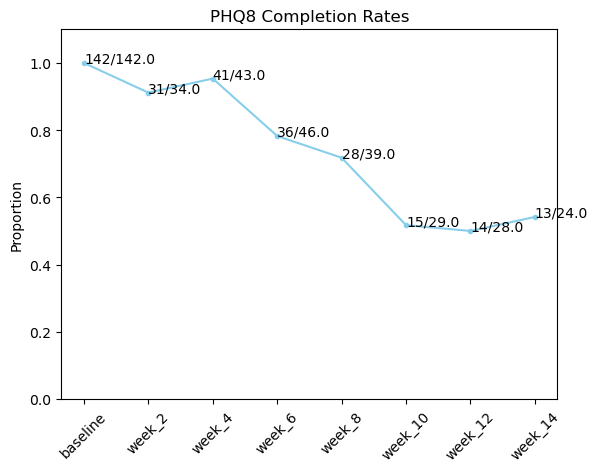

In [56]:
fig1, ax1 = plt.subplots()

ax1.plot(completion_rates.loc[:,['phq8_complete',]].dropna(), linestyle='-', color='skyblue', marker='.',)

for i, txt in enumerate(completion_rates['phq8_complete_text'].dropna()):
    ax1.annotate(txt, (completion_rates.loc[:,['phq8_complete',]].dropna().index.values[i], completion_rates.loc[:,['phq8_complete',]].dropna().values[i]))

plt.ylim([0,1.1])
#plt.legend(loc='lower left')
plt.xticks(rotation = 45)
plt.title('PHQ8 Completion Rates')
plt.ylabel('Proportion')
plt.show()

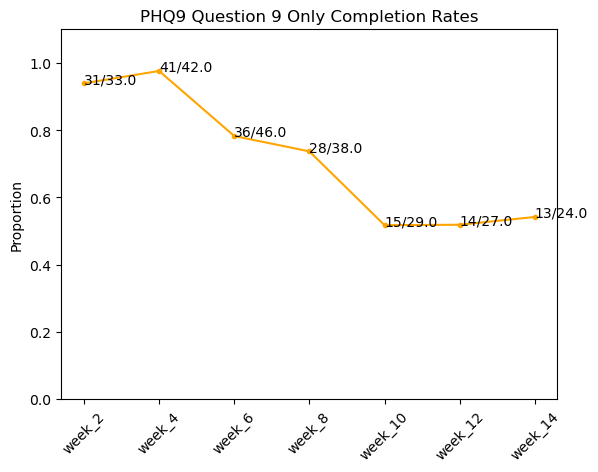

In [55]:
fig2, ax2 = plt.subplots()

ax2.plot(completion_rates.loc[:,['phq9_complete',]].dropna(), linestyle='-', color='orange' ,marker='.',)

for i, txt in enumerate(completion_rates['phq9_complete_text'].dropna()):
    ax2.annotate(txt, (completion_rates.loc[:,['phq9_complete',]].dropna().index.values[i], completion_rates.loc[:,['phq9_complete',]].dropna().values[i]))

plt.ylim([0,1.1])
#plt.legend(loc='lower left')
plt.xticks(rotation = 45)
plt.title('PHQ9 Question 9 Only Completion Rates')
plt.ylabel('Proportion')
plt.show()

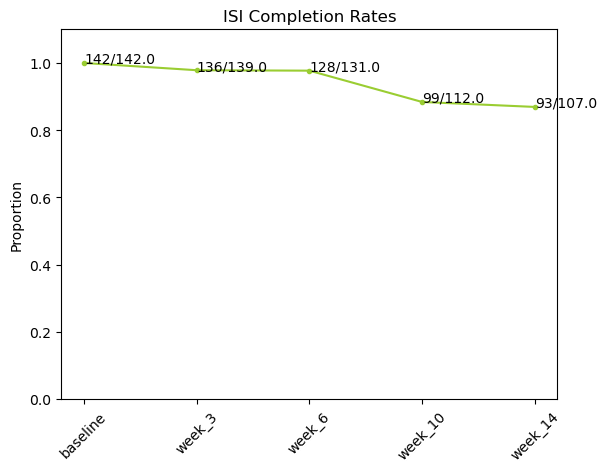

In [57]:
fig3, ax3 = plt.subplots()

ax3.plot(completion_rates.loc[:,['isi_completed']].dropna(), linestyle='-', color='yellowgreen' ,marker='.',)

for i, txt in enumerate(completion_rates['isi_completed_text'].dropna()):
    ax3.annotate(txt, (completion_rates.loc[:,['isi_completed',]].dropna().index.values[i], completion_rates.loc[:,['isi_completed',]].dropna().values[i]))

plt.ylim([0,1.1])
#plt.legend(loc='lower left')
plt.xticks(rotation = 45)
plt.title('ISI Completion Rates')
plt.ylabel('Proportion')
plt.show()

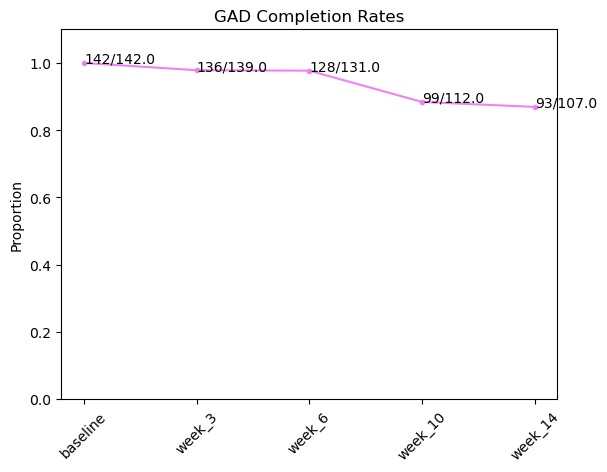

In [59]:
fig4, ax4 = plt.subplots()

ax4.plot(completion_rates.loc[:,['gad_complete']].dropna(), linestyle='-', color ='violet', marker='.',)

for i, txt in enumerate(completion_rates['gad_complete_text'].dropna()):
    ax4.annotate(txt, (completion_rates.loc[:,['gad_complete',]].dropna().index.values[i], completion_rates.loc[:,['gad_complete',]].dropna().values[i]))

plt.ylim([0,1.1])
#plt.legend(loc='lower left')
plt.xticks(rotation = 45)
plt.title('GAD Completion Rates')
plt.ylabel('Proportion')
plt.show()

[1.         0.91176471        nan 0.95348837 0.7826087  0.71794872
 0.51724138 0.5        0.54166667]


/var/folders/71/p0nsprlx033b24hgn0jyt5n40000gp/T/ipykernel_74043/3160404138.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['test','baseline', 'week_2', 'week_3', 'week_4', 'week_6', 'week_8',


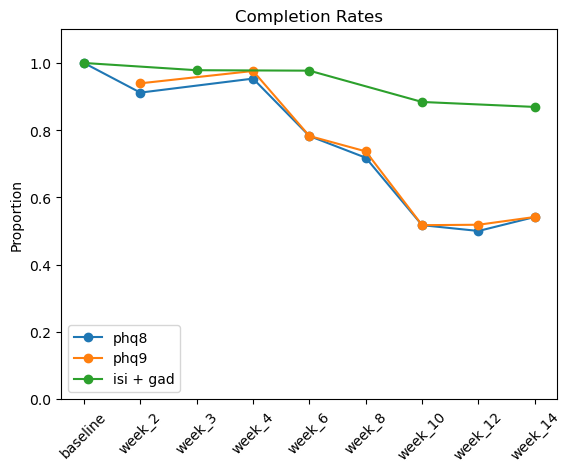

In [46]:
xs = np.arange(9)
seriesa = np.array(completion_rates['phq8_complete']).astype(np.double)
print(seriesa)
samask = np.isfinite(seriesa)
phq8_series = seriesa[samask]
series1 = np.array(completion_rates['phq9_complete']).astype(np.double)
s1mask = np.isfinite(series1)
phq9_series = series1[s1mask]
series2 = np.array(completion_rates['gad_complete']).astype(np.double)
s2mask = np.isfinite(series2)
gad_series = series2[s2mask]
series3 = np.array(completion_rates['isi_completed']).astype(np.double)
s3mask = np.isfinite(series2)
isi_series = series3[s3mask]

phq8_x = xs[samask]
phq9_x = xs[s1mask]
isi_gad_x = xs[s2mask]

fig, ax = plt.subplots()

ax.plot(xs[samask], seriesa[samask], linestyle='-', marker='o', label='phq8')
ax.plot(xs[s1mask], series1[s1mask], linestyle='-', marker='o', label='phq9')
#ax.plot(xs[s2mask], series2[s2mask], linestyle='-', marker='o', label='gad')
ax.plot(xs[s3mask], series3[s3mask], linestyle='-', marker='o', label='isi + gad')
ax.set_xticklabels(['test','baseline', 'week_2', 'week_3', 'week_4', 'week_6', 'week_8',
       'week_10', 'week_12', 'week_14'])
plt.ylim([0,1.1])
plt.legend(loc='lower left')
plt.xticks(rotation = 45)
plt.title('Completion Rates')
plt.ylabel('Proportion')
plt.show()

#TODO add legend

Of the participants who were randomized (n=142), I need to know how many weeks they were in the study. The number of participant-weeks will be the denominator for completion rates. The numerator will be how many of those weeks a survey was completed for each respective survey: PHQ, GAD, ISI.

Missing 36 people (141-105) in "withdrawn after randomization" excel

In [47]:
completion_overall = completion_rates.drop(columns=['phq8_complete_text','phq9_complete_text','gad_complete_text','isi_completed_text'])
completion_overall.loc['overall'] = {'phq8_complete':phq8_overall,'phq9_complete':phq9_overall,'gad_complete':gad_overall,'isi_completed':isi_overall}
completion_overall.round(decimals=2)

,phq8_complete,phq9_complete,gad_complete,isi_completed
redcap_event_name,,,,
baseline,1.00,NaN,1.00,1.00
week_2,0.91,0.94,NaN,NaN
week_3,NaN,NaN,0.98,0.98
week_4,0.95,0.98,NaN,NaN
week_6,0.78,0.78,0.98,0.98
week_8,0.72,0.74,NaN,NaN
week_10,0.52,0.52,0.88,0.88
week_12,0.50,0.52,NaN,NaN
week_14,0.54,0.54,0.87,0.87


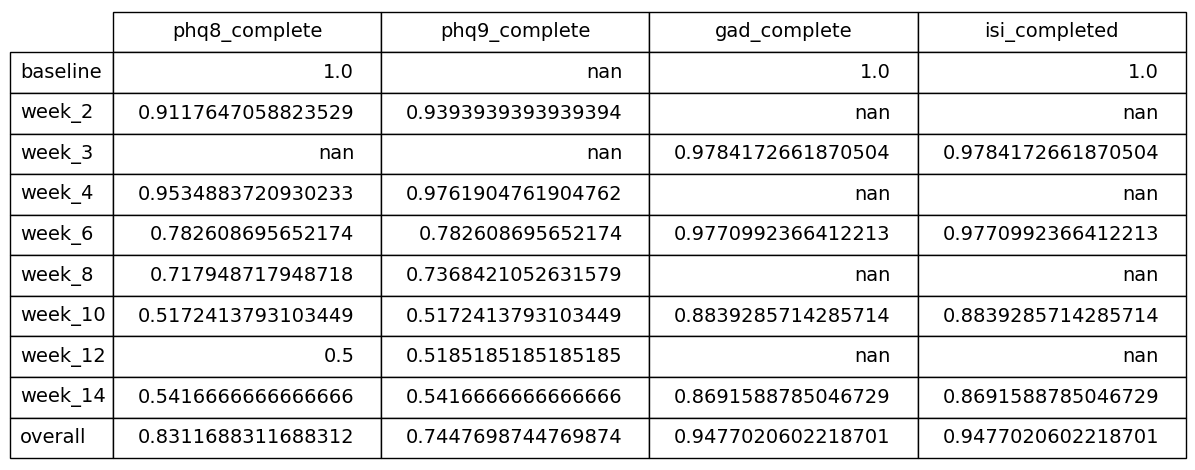

In [48]:
#define figure and axes
fig, ax = plt.subplots()

#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create table
table = ax.table(cellText=completion_overall.values, rowLabels=completion_overall.index, colLabels=completion_overall.columns, loc='center')

#display table
fig.tight_layout()
table.set_fontsize(14)
table.scale(2,2)
plt.show()